# Second Simulation
The library will purchase two types of resources, book and e-book.

In [1]:
import random
import numpy as np
import pandas as pd
import math

# labor cost, cataloging cost and maintenance fee
These costs are parts of the budget.

In [2]:
def labor_costs(annual_work_hour):
    """
    This function calculates the hourly wage of a cataloger. The formulae is from the reference book.
    The annual wage is randomly selected from a wage range.
    Paid off hours are the hours that a cataloger does not work but still get payments.
    :param annual_work_hour: integer. A cataloger's annual work hours.
    :return: float. A cataloger's hourly wage.
    >>> 25 < labor_costs(1950) < 48
    True
    """
    annual_wages = random.randint(50000, 70000)
    benefit_rate = random.uniform(0, 0.3)
    paid_off_hour = random.randint(0, 42)
    average_cost = (annual_wages + (annual_wages * benefit_rate)) / (annual_work_hour - paid_off_hour)
    return round(average_cost, 2)


labor_costs(1950)

34.48

In [3]:
def maintenance_cost(annual_work_hour, total_volume):
    """
    This function calculates an annual maintenance cost of the total collections in a library.
    The maintenance cost is calculated from the labor cost and the volume of collections.
    :param annual_work_hour: integer. A cataloger's annual work hours.
    :param total_volume: integer. The total collections in a library.
    :return: float. The maintenance cost.
    >>> 2000 < maintenance_cost(1950, 50000) < 3840
    True
    """
    maintenance_fee = labor_costs(annual_work_hour) * 0.04
    volumes_per_box = math.ceil(total_volume / 25)
    maintenance_total = volumes_per_box * maintenance_fee
    return round(maintenance_total, 2)


maintenance_cost(1950, 50000)

2694.4

In [4]:
def cataloging_cost(annual_work_hour):
    """
    This function calculate the cataloging cost of each book. The cost is random in a range.
    :param annual_work_hour: Integer. a cataloger's annual total work hours in general.
    :return: Float. a cataloging cost of each book.
    >>> 16.6 < cataloging_cost(1950) < 48
    True
    """
    day_cataloging = random.randint(8, 12)
    daily_labor = labor_costs(annual_work_hour) * 8
    cost_per_book = daily_labor / day_cataloging
    return round(cost_per_book, 2)


cataloging_cost(1950)

24.51

# price of printed book

In [5]:
def get_price(num_of_titles):
    """
    This function calculates the price of printed books. The price is random in a range.
    :param num_of_titles: the number of books in a random list.
    :return: float. the random printed book prices.
    >>> 0.1 < get_price(1000) < 200
    True
    """
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_price = random.uniform(0.01, 0.1)
    price = np.around(page_price * pages, decimals=2)
    return price


get_price(20)

array([152.12, 165.86, 125.31,   9.99,  40.63, 102.91,  67.69,  38.13,
       125.56,  25.73, 160.53,  85.01,  61.87,  66.61, 151.79,  72.19,
        38.47,  79.18, 125.9 ,   3.5 ])

# level of demand
The book list shows the level of demand of a book. 3 is the highest, 2 is the medium, and 1 is the lowest.
The level of demand is randomly selected.
For the Demand Strategic, the book list will be sorted by the level of demand from the highest to the lowest.
# cataloging cost
These books will be cataloged by one cataloger, so the books have the same cataloging fee at one times.

In [6]:
def get_book_list(num_of_titles, annual_work_hour):
    """
    This function generates a list of books that are randomly selected in pages, page thickness, price, and demand level.
    :param num_of_titles: Integer. the number of books that a random book list contains. a librarian will purchase books from it.
    :param annual_work_hour: Integer. a cataloger's annual total work hours in general.
    :return: DataFrame. the columns are thickness, price, demand, and cataloging cost.
    >>> a = get_book_list(10, 1950)
    >>> len(a)
        10
    """
    cost_per_book = cataloging_cost(annual_work_hour)
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_thickness = np.random.uniform(0.01, 0.05, size=num_of_titles)
    thickness = np.around(page_thickness * pages, decimals=2)
    price = get_price(num_of_titles)
    demand_list = [1, 2, 3]
    demands = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        # print(demand)
        demands.append(demand)

    df = pd.DataFrame(data={'Thickness': thickness,
                            'Price': price,
                            'Demand': demands,
                            'cataloging cost': cost_per_book})
    return df


get_book_list(10, 1950)

,Thickness,Price,Demand,cataloging cost
0,17.61,87.62,3,25.21
1,22.96,101.32,2,25.21
2,11.66,126.09,1,25.21
3,65.51,20.98,2,25.21
4,44.36,31.43,2,25.21
5,4.82,145.59,2,25.21
6,12.86,54.41,3,25.21
7,40.87,151.01,2,25.21
8,20.88,38.16,2,25.21
9,3.72,5.03,1,25.21


# level of demand and contract
The ebook with high demand will be randomly selected a contract3 (unlimited users) or contract2 (limited use for 3 users).
The ebook with medium demand will be randomly selected a contract2 (limited use for 3 users) or contract1(limited use for 1 user).
The ebook with low demand will be selected a contract1(limited use for 1 user).
# cataloging cost
These e-books will be cataloged by one cataloger, so the e-books have the same cataloging fee at one times.

In [7]:
def get_ebook_list(num_of_titles, annual_work_hour):
    """
    This function generates a list of ebooks that are randomly selected in pages, prices, demand level, and contract type.
    :param num_of_titles: Integer. the number of ebooks that a random ebook list contains. a librarian will purchase ebooks from it.
    :param annual_work_hour: Integer. a cataloger's annual total work hours in general.
    :return: DataFrame. the columns are price of printed version, demand level, contract type, ebook price, and cataloging cost.
    >>> a = get_ebook_list(10, 1950)
    >>> len(a)
    10
    """
    cost_per_book = cataloging_cost(annual_work_hour)
    printed_price = get_price(num_of_titles)
    demand_list = [1, 2, 3]
    demand_select = []
    high_demand_contract = [3, 2]
    mid_demand_contract = [2, 1]
    contract_price_1 = 1.3
    contract_price_2 = 1.3 * 1.5
    contract_price_3 = 1.3 * 2
    contract_select = []
    price_select = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        demand_select.append(demand)
        if demand == 3:
            contract = random.choice(high_demand_contract)
            contract_select.append(contract)
            if contract == 3:
                price_select.append(contract_price_3)
            elif contract == 2:
                price_select.append(contract_price_2)
        elif demand == 2:
            contract = random.choice(mid_demand_contract)
            contract_select.append(contract)
            if contract == 2:
                price_select.append(contract_price_2)
            elif contract == 1:
                price_select.append(contract_price_1)
        elif demand == 1:
            contract_select.append(1)
            price_select.append(contract_price_1)

    df = pd.DataFrame(data={'Printed Price': printed_price,
                            'Demand': demand_select,
                            'Contract': contract_select,
                            'Contract rate': price_select,
                            'Ebook Price': np.round(printed_price * price_select, decimals=2),
                            'cataloging cost': cost_per_book})
    return df


get_ebook_list(10, 1950)

,Printed Price,Demand,Contract,Contract rate,Ebook Price,cataloging cost
0,21.66,1,1,1.30,28.16,29.87
1,71.99,3,3,2.60,187.17,29.87
2,23.24,3,3,2.60,60.42,29.87
3,95.13,2,2,1.95,185.50,29.87
4,99.19,2,1,1.30,128.95,29.87
5,184.33,1,1,1.30,239.63,29.87
6,39.66,2,1,1.30,51.56,29.87
7,191.55,1,1,1.30,249.02,29.87
8,64.28,2,1,1.30,83.56,29.87
9,91.57,1,1,1.30,119.04,29.87


# discount for books
When the library buys many books at one times, there is a discount.

In [8]:
def vendor_discount(num_book_buy):
    """
    This function calculates the percentage of discount that a vendor will offer based on how many books you purchase.
    :param num_book_buy: Integer. A number of books that a librarian will purchase.
    :return: float. A discount rate.
    >>> vendor_discount(1000)
    0.05
    >>> vendor_discount(280)
    0.02
    >>> vendor_discount(50)
    0.01
    """
    if num_book_buy < 100:
        return 0.01
    elif 100 <= num_book_buy < 500:
        return 0.02
    elif num_book_buy >= 500:
        return 0.05


vendor_discount(280)

0.02

In [9]:
# the codes here is used for testing select_book() and select_ebook() functions.

book_plan = get_book_list(1000, 1950)
ebook_plan = get_ebook_list(1000, 1950)
book_demand_order = book_plan.sort_values(by='Demand', ascending=False)
book_price_order = book_plan.sort_values(by='Price', ascending=True)
ebook_demand_order = ebook_plan.sort_values(by='Demand', ascending=False)
ebook_price_order = ebook_plan.sort_values(by='Ebook Price', ascending=True)


# select
The book list is sorted by demand levels or prices, so we will select from the first book till the one that the accumulate price and thickness meet the limitations.

In [10]:
def select_book(order, book_budget, space):
    """
    This function selects the books from the book list that generated by "get_book_list" function.
    This function will select books from the fist row till the row that meets the budget and space limitations.
    :param order: Data Frame. The list we will select from.
    :param book_budget: integer. The budget for purchasing books.
    :param space: integer. Available shelf space.
    :return: Data Frame. The list of books we select for purchasing.
    >>> plan = get_book_list(10, 1950)
    >>> a = select_book(plan, 1000, 500)
    >>> a.isnull().values.any()
    False
    """
    select_plan = order.copy(deep=True)
    select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= book_budget)
    select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
    acquisitions = select_plan.dropna()
    return acquisitions


select_book(book_demand_order, 20000, 50000)

,Thickness,Price,Demand,cataloging cost,total_cost_per_book,cost_accumulate,Total_thickness
0,34.79,31.92,3,26.07,57.99,57.99,34.79
607,86.67,33.32,3,26.07,59.39,117.38,121.46
503,19.09,19.18,3,26.07,45.25,162.63,140.55
1,55.48,32.02,3,26.07,58.09,220.72,196.03
498,5.20,99.60,3,26.07,125.67,346.39,201.23
494,33.36,34.73,3,26.07,60.80,407.19,234.59
492,27.33,53.28,3,26.07,79.35,486.54,261.92
490,19.74,63.21,3,26.07,89.28,575.82,281.66
483,39.15,80.63,3,26.07,106.70,682.52,320.81
477,21.39,46.99,3,26.07,73.06,755.58,342.20


# the book list is sorted by prices

In [11]:
select_book(book_price_order, 20000, 50000)

,Thickness,Price,Demand,cataloging cost,total_cost_per_book,cost_accumulate,Total_thickness
45,13.82,0.62,3,26.07,26.69,26.69,13.82
938,35.78,0.62,1,26.07,26.69,53.38,49.60
499,20.63,0.68,2,26.07,26.75,80.13,70.23
425,42.30,0.78,1,26.07,26.85,106.98,112.53
850,16.59,0.83,1,26.07,26.90,133.88,129.12
369,21.88,0.83,3,26.07,26.90,160.78,151.00
541,28.13,1.20,2,26.07,27.27,188.05,179.13
699,67.02,1.20,2,26.07,27.27,215.32,246.15
584,40.95,1.30,3,26.07,27.37,242.69,287.10
534,22.09,1.35,1,26.07,27.42,270.11,309.19


# select
The e-book list is sorted by demand levels or prices, so we will select from the first book till the one that the accumulate price meets the budget limitation.

In [12]:
def select_ebook(order, ebook_budget):
    """
    This function selects the ebooks from the ebook list that generated by "get_ebook_list" function.
    :param order: Data Frame. The list we will select from.
    :param ebook_budget: integer. The budget for purchasing ebooks.
    :return:
    """
    select_plan = order.copy(deep=True)
    select_plan['total_cost_per_ebook'] = select_plan['Ebook Price'] + select_plan['cataloging cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_ebook'].cumsum().where(lambda x: x <= ebook_budget)
    acquisitions = select_plan.dropna()
    return acquisitions


select_ebook(ebook_demand_order, 20000)

,Printed Price,Demand,Contract,Contract rate,Ebook Price,cataloging cost,total_cost_per_ebook,cost_accumulate
999,15.40,3,3,2.60,40.04,33.15,73.19,73.19
387,60.71,3,3,2.60,157.85,33.15,191.00,264.19
854,25.33,3,3,2.60,65.86,33.15,99.01,363.20
855,26.01,3,3,2.60,67.63,33.15,100.78,463.98
436,56.90,3,3,2.60,147.94,33.15,181.09,645.07
434,58.86,3,2,1.95,114.78,33.15,147.93,793.00
430,31.60,3,3,2.60,82.16,33.15,115.31,908.31
429,10.15,3,2,1.95,19.79,33.15,52.94,961.25
861,40.35,3,3,2.60,104.91,33.15,138.06,1099.31
423,10.90,3,3,2.60,28.34,33.15,61.49,1160.80


# the e-book list is sorted by prices

In [13]:
select_ebook(ebook_price_order, 20000)

,Printed Price,Demand,Contract,Contract rate,Ebook Price,cataloging cost,total_cost_per_ebook,cost_accumulate
407,0.31,2,1,1.30,0.40,33.15,33.55,33.55
712,0.37,1,1,1.30,0.48,33.15,33.63,67.18
294,0.37,3,2,1.95,0.72,33.15,33.87,101.05
961,0.69,1,1,1.30,0.90,33.15,34.05,135.10
697,0.56,2,2,1.95,1.09,33.15,34.24,169.34
515,0.47,3,3,2.60,1.22,33.15,34.37,203.71
1,0.97,1,1,1.30,1.26,33.15,34.41,238.12
326,0.66,2,2,1.95,1.29,33.15,34.44,272.56
10,0.66,2,2,1.95,1.29,33.15,34.44,307.00
59,0.91,2,2,1.95,1.77,33.15,34.92,341.92


# The result of two strategics.
The Demand Strategic shows the total number, total price of books and e-books, and the total thickness of books.
The Price Strategic shows the total number, total price of books and e-books, and the total thickness of books.

In [14]:
def MonteCarloSimulation(annual_work_hour, total_volume, budget, space, num_of_titles, book_rate, ebook_rate) -> list:
    """
    This function an MC simulation for acquisitions. There are two strategies for getting books:
    1. Demand Strategic: Meet the users' demands first. (Buy resources with high demand.)
    2. Price Strategic: Buy as many books as possible in a budget and space.
    :param annual_work_hour: integer. a cataloger's annual total work hours in general.
    :param total_volume: integer. The total collections in a library.
    :param budget: integer. The budget for purchasing books and ebooks.
                   It also includes the cataloging fee and maintenance cost.
    :param space: integer. Available shelf space.
    :param num_of_titles: integer. a number of books in a random list.
    :param book_rate: the percentage of budget for books.
    :param ebook_rate: the percentage of budget for ebooks.
    :return: a list of the results of the two strategics.
             book's amount, cost, and thickness from the two strategics.
             ebook's amount, cost from the two strategics.
    """
    acquisition_budget = budget - maintenance_cost(annual_work_hour, total_volume)
    book_budget = acquisition_budget * book_rate
    ebook_budget = acquisition_budget * ebook_rate

    book_plan = get_book_list(num_of_titles, annual_work_hour)
    ebook_plan = get_ebook_list(num_of_titles, annual_work_hour)

    book_demand_order = book_plan.sort_values(by='Demand', ascending=False)
    book_price_order = book_plan.sort_values(by='Price', ascending=True)
    ebook_demand_order = ebook_plan.sort_values(by='Demand', ascending=False)
    ebook_price_order = ebook_plan.sort_values(by='Ebook Price', ascending=True)

    ebook_demand_acquisition = select_ebook(ebook_demand_order, ebook_budget)
    ebook_price_acquisition = select_ebook(ebook_price_order, ebook_budget)
    book_demand_acquisition = select_book(book_demand_order, book_budget, space)
    book_price_acquisition = select_book(book_price_order, book_budget, space)

    book_demand_num = book_demand_acquisition['Price'].count()
    book_demand_cost = round(book_demand_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(book_demand_num)), 2)
    book_demand_thickness = math.ceil(book_demand_acquisition['Thickness'].sum())
    ebook_demand_num = ebook_demand_acquisition['Ebook Price'].count()
    ebook_demand_cost = round(ebook_demand_acquisition['total_cost_per_ebook'].sum(), 2)

    book_price_num = book_price_acquisition['Price'].count()
    book_price_cost = round(book_price_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(book_price_num)), 2)
    book_price_thickness = math.ceil(book_price_acquisition['Thickness'].sum())
    ebook_price_num = ebook_price_acquisition['Ebook Price'].count()
    ebook_price_cost = round(ebook_price_acquisition['total_cost_per_ebook'].sum(), 2)

    sim_data = [book_demand_num, book_demand_cost, book_demand_thickness, book_price_num, book_price_cost, book_price_thickness,
                ebook_demand_num, ebook_demand_cost, ebook_price_num, ebook_price_cost]

    return sim_data


MonteCarloSimulation(1950, 50000, 20000, 50000, 1000, 0.5, 0.5)

The Book Demand Strategic:
 Purchase amount: 210 
 Total Price: 8521.36 
 Total Thickness: 6584 
 
 The E-book Demand Strategic:
 Purchase amount: 125 
 Total Price: 8697.59 
 

 The Book Price Strategic:
 Purchase amount: 279 
 Total Price: 8489.33 
 Total Thickness: 8101 
 
 The E-book Price Strategic:
 Purchase amount: 191 
 Total Price: 8685.79


[210, 8521.36, 6584, 279, 8489.33, 8101, 125, 8697.59, 191, 8685.79]

# When we do 100 times simulations
The results of the 100 simulations.

In [16]:
if __name__ == '__main__':

    data = []
    for i in range(100):
        list = MonteCarloSimulation(1950, 50000, 20000, 100000, 1000, 0.5, 0.5)
        data.append(list)
    simulation_result = pd.DataFrame(data, columns=['num_of_book_by_demand',
                                                    'book_cost_by_demand',
                                                    'book_thickness_by_demand',
                                                    'num_of_book_by_price',
                                                    'book_cost_by_price',
                                                    'book_thickness_by_price',
                                                    'num_of_ebook_by_demand',
                                                    'ebook_cost_by_demand',
                                                    'num_of_ebook_by_price',
                                                    'ebook_cost_by_price'])

    simulation_result['total_num_by_demand'] = \
        simulation_result['num_of_book_by_demand'] + simulation_result['num_of_ebook_by_demand']
    simulation_result['total_cost_by_demand'] = \
        simulation_result['book_cost_by_demand'] + simulation_result['ebook_cost_by_demand']
    simulation_result['total_num_by_price'] = \
        simulation_result['num_of_book_by_price'] + simulation_result['num_of_ebook_by_price']
    simulation_result['total_cost_by_price'] = \
        simulation_result['book_cost_by_price'] + simulation_result['ebook_cost_by_demand']

simulation_result

The Book Demand Strategic:
 Purchase amount: 67 
 Total Price: 8499.84 
 Total Thickness: 1876 
 
 The E-book Demand Strategic:
 Purchase amount: 80 
 Total Price: 8656.64 
 

 The Book Price Strategic:
 Purchase amount: 181 
 Total Price: 8509.84 
 Total Thickness: 5697 
 
 The E-book Price Strategic:
 Purchase amount: 237 
 Total Price: 8704.22
The Book Demand Strategic:
 Purchase amount: 163 
 Total Price: 8452.37 
 Total Thickness: 4711 
 
 The E-book Demand Strategic:
 Purchase amount: 34 
 Total Price: 8578.01 
 

 The Book Price Strategic:
 Purchase amount: 250 
 Total Price: 8434.39 
 Total Thickness: 6614 
 
 The E-book Price Strategic:
 Purchase amount: 142 
 Total Price: 8626.74
The Book Demand Strategic:
 Purchase amount: 97 
 Total Price: 8584.06 
 Total Thickness: 2902 
 
 The E-book Demand Strategic:
 Purchase amount: 120 
 Total Price: 8679.52 
 

 The Book Price Strategic:
 Purchase amount: 235 
 Total Price: 8471.7 
 Total Thickness: 7343 
 
 The E-book Price Strategi

The Book Demand Strategic:
 Purchase amount: 76 
 Total Price: 8211.96 
 Total Thickness: 2246 
 
 The E-book Demand Strategic:
 Purchase amount: 37 
 Total Price: 8106.83 
 

 The Book Price Strategic:
 Purchase amount: 156 
 Total Price: 8083.02 
 Total Thickness: 4602 
 
 The E-book Price Strategic:
 Purchase amount: 167 
 Total Price: 8301.06
The Book Demand Strategic:
 Purchase amount: 150 
 Total Price: 8665.22 
 Total Thickness: 4925 
 
 The E-book Demand Strategic:
 Purchase amount: 47 
 Total Price: 8739.43 
 

 The Book Price Strategic:
 Purchase amount: 242 
 Total Price: 8644.24 
 Total Thickness: 7850 
 
 The E-book Price Strategic:
 Purchase amount: 176 
 Total Price: 8816.57
The Book Demand Strategic:
 Purchase amount: 173 
 Total Price: 8603.49 
 Total Thickness: 4747 
 
 The E-book Demand Strategic:
 Purchase amount: 75 
 Total Price: 8682.1 
 

 The Book Price Strategic:
 Purchase amount: 262 
 Total Price: 8584.47 
 Total Thickness: 7651 
 
 The E-book Price Strategi

The Book Demand Strategic:
 Purchase amount: 72 
 Total Price: 8324.03 
 Total Thickness: 2387 
 
 The E-book Demand Strategic:
 Purchase amount: 43 
 Total Price: 8183.71 
 

 The Book Price Strategic:
 Purchase amount: 177 
 Total Price: 8287.98 
 Total Thickness: 5293 
 
 The E-book Price Strategic:
 Purchase amount: 175 
 Total Price: 8462.33
The Book Demand Strategic:
 Purchase amount: 95 
 Total Price: 8539.53 
 Total Thickness: 2712 
 
 The E-book Demand Strategic:
 Purchase amount: 33 
 Total Price: 8271.88 
 

 The Book Price Strategic:
 Purchase amount: 189 
 Total Price: 8455.45 
 Total Thickness: 5831 
 
 The E-book Price Strategic:
 Purchase amount: 144 
 Total Price: 8604.62
The Book Demand Strategic:
 Purchase amount: 76 
 Total Price: 8664.97 
 Total Thickness: 2458 
 
 The E-book Demand Strategic:
 Purchase amount: 67 
 Total Price: 8819.47 
 

 The Book Price Strategic:
 Purchase amount: 200 
 Total Price: 8665.04 
 Total Thickness: 6763 
 
 The E-book Price Strategic

The Book Demand Strategic:
 Purchase amount: 80 
 Total Price: 8529.09 
 Total Thickness: 2205 
 
 The E-book Demand Strategic:
 Purchase amount: 66 
 Total Price: 8557.43 
 

 The Book Price Strategic:
 Purchase amount: 197 
 Total Price: 8460.21 
 Total Thickness: 5705 
 
 The E-book Price Strategic:
 Purchase amount: 195 
 Total Price: 8635.55
The Book Demand Strategic:
 Purchase amount: 192 
 Total Price: 8240.06 
 Total Thickness: 5540 
 
 The E-book Demand Strategic:
 Purchase amount: 91 
 Total Price: 8396.73 
 

 The Book Price Strategic:
 Purchase amount: 285 
 Total Price: 8246.7 
 Total Thickness: 7848 
 
 The E-book Price Strategic:
 Purchase amount: 210 
 Total Price: 8389.84
The Book Demand Strategic:
 Purchase amount: 136 
 Total Price: 8610.4 
 Total Thickness: 4564 
 
 The E-book Demand Strategic:
 Purchase amount: 58 
 Total Price: 8682.52 
 

 The Book Price Strategic:
 Purchase amount: 277 
 Total Price: 8612.63 
 Total Thickness: 8922 
 
 The E-book Price Strategic

,num_of_book_by_demand,book_cost_by_demand,book_thickness_by_demand,num_of_book_by_price,book_cost_by_price,book_thickness_by_price,num_of_ebook_by_demand,ebook_cost_by_demand,num_of_ebook_by_price,ebook_cost_by_price,total_num_by_demand,total_cost_by_demand,total_num_by_price,total_cost_by_price
0,67,8499.84,1876,181,8509.84,5697,80,8656.64,237,8704.22,147,17156.48,418,17166.48
1,163,8452.37,4711,250,8434.39,6614,34,8578.01,142,8626.74,197,17030.38,392,17012.40
2,97,8584.06,2902,235,8471.70,7343,120,8679.52,255,8670.15,217,17263.58,490,17151.22
3,65,8259.60,1950,162,8183.28,5118,33,8096.03,135,8347.70,98,16355.63,297,16279.31
4,68,8426.81,1884,200,8321.97,6201,45,8417.96,179,8486.59,113,16844.77,379,16739.93
5,87,8595.32,2428,201,8543.06,5898,69,8746.13,228,8759.63,156,17341.45,429,17289.19
6,188,8499.78,5382,234,8511.47,6740,35,8419.86,180,8696.18,223,16919.64,414,16931.33
7,61,8065.48,1738,163,8044.52,5116,49,8166.42,170,8178.24,110,16231.90,333,16210.94
8,128,8487.84,3826,209,8561.92,6041,56,8669.46,186,8687.03,184,17157.30,395,17231.38
9,104,8471.90,2825,225,8518.84,6817,44,8627.43,190,8715.23,148,17099.33,415,17146.27


# visualization

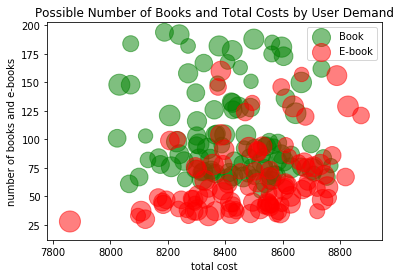

In [22]:
import matplotlib.pyplot as plt


a = simulation_result['book_cost_by_demand']
b = simulation_result['num_of_book_by_demand']
c = simulation_result['book_cost_by_price']
d = simulation_result['num_of_book_by_price']
e = simulation_result['book_thickness_by_demand']
f = simulation_result['book_thickness_by_price']
g = simulation_result['num_of_ebook_by_demand']
h = simulation_result['num_of_ebook_by_price']
i = simulation_result['ebook_cost_by_demand']
j = simulation_result['ebook_cost_by_price']
k = simulation_result['total_num_by_demand']
l = simulation_result['total_num_by_price']
m = simulation_result['total_cost_by_demand']
n = simulation_result['total_cost_by_price']

s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible number of books and e-books and the costs by User Demand")
plt.scatter(a, b, s, c="g", alpha=0.5, marker='.',
            label="Book")
plt.scatter(i, g, s, c="r", alpha=0.5, marker='.',
            label="E-book")
plt.xlabel("total cost")
plt.ylabel("number of books and e-books")
plt.legend()

plt.show()

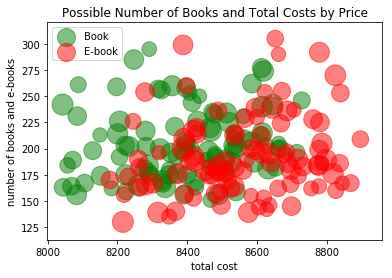

In [23]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(c, d, s, c="g", alpha=0.5, marker='.',
            label="Book")
plt.scatter(j, h, s, c="r", alpha=0.5, marker='.',
            label="E-book")
plt.xlabel("total cost")
plt.ylabel("number of books and e-books")
plt.legend()

plt.show()

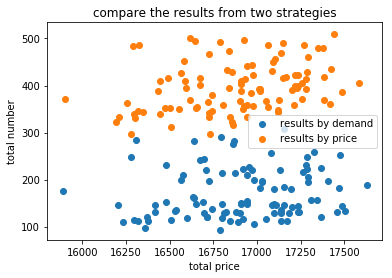

In [26]:
plt.scatter(m, k, label='results by demand')
plt.scatter(n, l, label='results by price')
plt.xlabel('total price')
plt.ylabel('total number')

plt.title('compare the results from two strategies')

plt.legend()

plt.show()